# Metode Numerik Elemen Hingga

Kasus 4.1 dari Buku **An Introduction to Computational Fluid Dynamics: The Finite Volume Method** Edisi ke-2, Halaman 118.
Mohon mengacu pada buku/halaman tersebut, gambar dlsbnya (dapat) tidak ditampilkan. 

## Worked Examples: one-dimensional steady state diffusion

Governing Equation: 
$$\frac{d}{dx} \left( k \frac{dT}{dx} \right) + S = 0$$

### Example 4.1

> Consider the problem of source-free heat conduction in an insulated rod whose ends are maintained at constant temperatures of 100 C and 500 C, respectively.
> Calculate the steady state temperature distribution in the rod. Thermal conductivity $k = 1000\ W/m.K$, cross-sectional area $A = 10 \times 10^{-3} m^{2}$

In [12]:
#preset - Mendefinisikan inisial/awal
import numpy as np
from decimal import Decimal as dec

def add_dec(num1, num2):
    return float(dec(str(num1)) + dec(str(num2)))

def create_axis(nodes, dx):
    axisx = [0]
    x = 0
    for i in range(1, nodes+1):
        if i == 1:
            x = add_dec(x, dx/2)
            axisx.append(x)
        else:
            x = add_dec(x, dx)
            axisx.append(x)
    axisx.append(add_dec(x, dx/2))
    return axisx

TA = 100 # (K) - Suhu pada Tepi kiri (west)
TB = 500 # (K) - Suhu pada Tepi kanan (east)
L = 0.5 # (m) - Panjang pipa
A = 10*10**-3 # (m) - Penampang pipa
k = 1000 # (W/m.K) - konduktivitas

dx = 0.1 # (m) - jarak control volume

nodes = int(L/dx) # (..) - jumlah noda
print('Suhu di titik \tA = {:3d} K\nSuhu di titik \tB = {:3d} K\ndengan panjang \tL = {:2.1f} m'.format(TA,TB,L))
print('Jumlah Noda \t  = {:>3d}\tdengan dx = {:2.1f} m'.format(nodes,dx))
axisx = create_axis(nodes, dx)

Suhu di titik 	A = 100 K
Suhu di titik 	B = 500 K
dengan panjang 	L = 0.5 m
Jumlah Noda 	  =   5	dengan dx = 0.1 m


In [13]:
# Create matrix
mat_a = np.zeros([nodes, nodes])
mat_d = np.zeros([nodes])

for i in range(0, nodes):
    for j in range (0, nodes):
        if i == j and (i == 0): # Baris pertama
            aW = 0
            aE = k*A/dx
            SP = -(2*k*A/dx)
            aP = aW + aE - SP
            # Masukkan kedalam matrix
            mat_a[i,j] = aP
            mat_a[i,j+1] = -aE
        elif i == j  and (i > 0 and i < nodes-1):
            aW = k/dx*A
            aE = k/dx*A
            SP = 0
            aP = aW + aE - SP
            mat_a[i, j-1] = -aW
            mat_a[i, j] = aP
            mat_a[i, j+1] = -aE
        elif i == j and (i == nodes-1):
            aW = k/dx*A
            aE = 0
            SP = -2*k/dx*A
            aP = aW + aE - SP
            mat_a[i, j-1] = -aW
            mat_a[i, j] = aP
            
for i in range(0, nodes):
    if i == 0:
        mat_d[i] = 200*TA
    elif i > 0 and i < nodes-1:
        mat_d[i] = 0
    elif i == nodes-1:
        mat_d[i] = 200*TB

print(mat_a, mat_d)
result = np.linalg.solve(mat_a, mat_d)
result = np.append(result, TB)
result = np.insert(result, 0, TA)
print(result)

# Solusi Analitik
exact = []
for x in axisx:
    T = 800*x + 100
    exact.append(T)


[[ 300. -100.    0.    0.    0.]
 [-100.  200. -100.    0.    0.]
 [   0. -100.  200. -100.    0.]
 [   0.    0. -100.  200. -100.]
 [   0.    0.    0. -100.  300.]] [ 20000.      0.      0.      0. 100000.]
[100. 140. 220. 300. 380. 460. 500.]


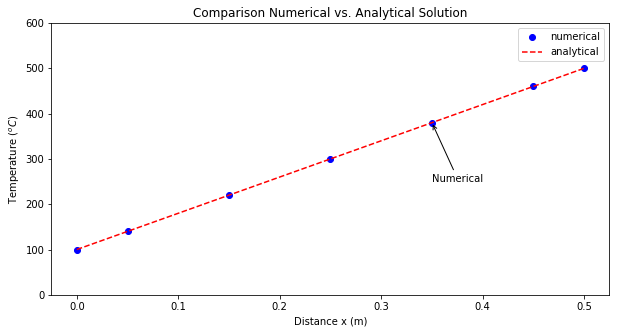

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,5)
plt.title('Comparison Numerical vs. Analytical Solution')
plt.ylim(TA-100, TB+100)
plt.xlabel('Distance x (m)')
plt.ylabel('Temperature $(^{o}C)$')
plt.plot(axisx, result, 'bo', label='numerical')
plt.plot(axisx, exact, 'r--', label='analytical')
plt.legend()


plt.annotate('Numerical', xy=(axisx[4],result[4]), xytext =(0.35,250),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),)

plt.show()